# LSTM实现

### LSTM介绍
长短期记忆网络（Long-Short Term Memory,LSTM）论文首次发表于1997年。由于独特的设计结构，LSTM适合于处理和预测时间序列中间隔和延迟非常长的重要事件。  
  
LSTM的表现通常比时间递归神经网络及隐马尔科夫模型（HMM）更好，比如用在不分段连续手写识别上。2009年，用LSTM构建的人工神经网络模型赢得过ICDAR手写识别比赛冠军。LSTM还普遍用于自主语音识别，2013年运用TIMIT自然演讲数据库达成17.7%错误率的纪录。作为非线性模型，LSTM可作为复杂的非线性单元用于构造更大型深度神经网络。

### LSTM结构
LSTM是一种含有LSTM区块（blocks）或其他的一种类神经网络，文献或其他资料中LSTM区块可能被描述成智能网络单元，因为它可以记忆不定时间长度的数值，区块中有一个gate能够决定input是否重要到能被记住及能不能被输出output。  
右图底下是四个S函数单元，最左边函数依情况可能成为区块的input，右边三个会经过gate决定input是否能传入区块，左边第二个为input gate，如果这里产出近似于零，将把这里的值挡住，不会进到下一层。左边第三个是forget gate，当这产生值近似于零，将把区块里记住的值忘掉。第四个也就是最右边的input为output gate，他可以决定在区块记忆中的input是否能输出 。  
LSTM有很多个版本，其中一个重要的版本是GRU（Gated Recurrent Unit），根据谷歌的测试表明，LSTM中最重要的是Forget gate，其次是Input gate，最次是Output gate

### LSTM网络的变体：双向循环神经网络和深层循环神经网络  
双向循环神经网络的主体结构是由两个单向循环神经网络组成的。在每一个时刻t，输入会同时提供给这两个方向相反的循环神经网络，而输出则是由这两个单向循环神经网络共同决定。  
六个权值分别对应：输入到向前和向后隐含层（w1, w3），隐含层到隐含层自己（w2, w5），向前和向后隐含层到输出层（w4, w6）。值得注意的是：向前和向后隐含层之间没有信息流，这保证了展开图是非循环的。  
深层循环神经网络：为了增强模型的表达能力，该网络在每一个时刻上将循环体结构复制多次，每一层的循环体中参数是一致的，而不同层中的参数可以不同。

### LSTM代码

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/home/ma-user/anaconda3/envs/TensorFlow-2.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#读取数据
data = pd.read_csv('./data/user_balance_table.csv', usecols=[4], engine='python')
dataf = data.values
def create_dataset(dataset, timesteps=36,predict_size=6):#构造数据集
    datax=[]#构造x
    datay=[]#构造y
    for each in range(len(dataset)-timesteps - predict_steps):
        x = dataset[each:each+timesteps,0]
        y = dataset[each+timesteps:each+timesteps+predict_steps,0]
        datax.append(x)
        datay.append(y)
    return datax, datay#np.array(datax),np.array(datay)

In [3]:
#构造train and predict
scaler = MinMaxScaler(feature_range=(0,1))
dataf = scaler.fit_transform(dataf)
train = dataf.copy()
timesteps = 10   #构造x
predict_steps = 10    #构造y
length = 100   #预测多步
trainx, trainy = create_dataset(train, timesteps, predict_steps)
trainx = np.array(trainx)
trainy = np.array(trainy)
#变换
trainx = np.reshape(trainx,(trainx.shape[0],timesteps,1))#变换shape,以满足keras

/home/ma-user/anaconda3/envs/TensorFlow-2.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
#lstm training
model = Sequential()
model.add(LSTM(128,input_shape=(timesteps,1),return_sequences= True))
model.add(Dropout(0.5))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64,return_sequences=False)) 
model.add(Dropout(0.2))
model.add(Dense(predict_steps))
#model.compile(loss="mean_squared_error",optimizer="adam")
model.compile(loss="mse",optimizer="adam")
model.fit(trainx,trainy, epochs=35, batch_size=256)

Train on 2840401 samples
Epoch 1/50
2840401/2840401 [==============================] - 63s 22us/sample - loss: 6.9010e-06
Epoch 2/50
2840401/2840401 [==============================] - 60s 21us/sample - loss: 6.8322e-06
Epoch 3/50
2840401/2840401 [==============================] - 60s 21us/sample - loss: 6.8288e-06
Epoch 4/50
2840401/2840401 [==============================] - 60s 21us/sample - loss: 6.8238e-06
Epoch 5/50
2840401/2840401 [==============================] - 61s 21us/sample - loss: 6.8211e-06
Epoch 6/50
2840401/2840401 [==============================] - 61s 21us/sample - loss: 6.8175e-06
Epoch 7/50
2840401/2840401 [==============================] - 60s 21us/sample - loss: 6.8169e-06
Epoch 8/50
2840401/2840401 [==============================] - 61s 21us/sample - loss: 6.8162e-06
Epoch 9/50
2840401/2840401 [==============================] - 61s 21us/sample - loss: 6.8136e-06
Epoch 10/50
2840401/2840401 [==============================] - 61s 21us/sample - loss: 6.8129e-06
Epoc

In [10]:
#predict
predict_xlist = []#添加预测x列表
predict_y = []#添加预测y列表
predict_xlist.extend(dataf[dataf.shape[0]-timesteps:dataf.shape[0],0].tolist())#已经存在的最后timesteps个数据添加进列表，预测新值(比如已经有的数据从1,2,3到288。现在要预测后面的数据，所以将216到288的72个数据添加到列表中，预测新的值即288以后的数据）
while len(predict_y) < length:
    predictx = np.array(predict_xlist[-timesteps:])#从最新的predict_xlist取出timesteps个数据，预测新的predict_steps个数据（因为每次预测的y会添加到predict_xlist列表中，为了预测将来的值，所以每次构造的x要取这个列表中最后的timesteps个数据词啊性）
    predictx = np.reshape(predictx,(1,timesteps,1))#变换格式，适应LSTM模型
    print("predictx"),print(predictx),print(predictx.shape)
    #预测新值
    lstm_predict = model.predict(predictx)
    predict_xlist.append(predictx)#新值y添加进列表，做x
    #滚动预测
    print("lstm_predict"),print(lstm_predict[0])
    predict_xlist.extend(lstm_predict[0])#将新预测出来的predict_steps个数据，加入predict_xlist列表，用于下次预测
    # invert
    lstm_predict = scaler.inverse_transform(lstm_predict)
    predict_y.extend(lstm_predict[0])#预测的结果y
    print("xlist", predict_xlist, len(predict_xlist))
    print(lstm_predict, len(lstm_predict))
    print(predict_y, len(predict_y))

predictx
[[[3.02326934e-07]
  [3.02326934e-07]
  [3.02326934e-07]
  [2.97370755e-07]
  [2.92414576e-07]
  [3.02326934e-07]
  [2.97370755e-07]
  [1.13843437e-05]
  [1.13892999e-05]
  [0.00000000e+00]]]
(1, 10, 1)
lstm_predict
[-2.0987754e-06 -4.3900497e-04 -3.5347804e-04  9.7735705e-05
 -5.8227088e-06  3.1825452e-04  3.3474434e-04  1.7607108e-05
  2.0771634e-04  1.8163263e-04]
xlist [3.0232693408650343e-07, 3.0232693408650343e-07, 3.0232693408650343e-07, 2.9737075483918366e-07, 2.9241457559186394e-07, 3.0232693408650343e-07, 2.9737075483918366e-07, 1.1384343731093415e-05, 1.1389299910340735e-05, 0.0, array([[[3.02326934e-07],
        [3.02326934e-07],
        [3.02326934e-07],
        [2.97370755e-07],
        [2.92414576e-07],
        [3.02326934e-07],
        [2.97370755e-07],
        [1.13843437e-05],
        [1.13892999e-05],
        [0.00000000e+00]]]), -2.0987754e-06, -0.00043900497, -0.00035347804, 9.7735705e-05, -5.8227088e-06, 0.00031825452, 0.00033474434, 1.7607108e-05, 0.0002

In [11]:
#error
y_ture = np.array(data.values[-100:])
train_score = np.sqrt(mean_squared_error(y_ture,predict_y))
print("train score RMSE: %.2f"% train_score)
y_predict = pd.DataFrame(predict_y,columns=["predict"])
#y_predict.to_csv("y_predict_LSTM.csv",index=False)

train score RMSE: 274677.88


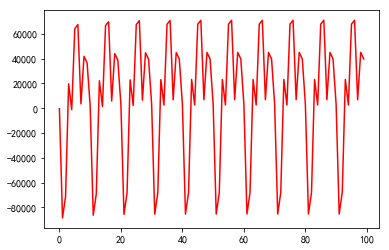

In [12]:
#plot
plt.plot(predict_y, c="r")
plt.show()